# Movie Recommendation System

A recommender system aims to suggest relevant content or products to users that might be liked or purchased by them. 
It helps to find items that the user is looking for — and they don’t even realize it until the recommendation is displayed. 
Different strategies have to be applied for different clients and they are determined by available data

### There are two main techniques used in recommendation system, known as content-based filtering and collaborative filtering.

#### Content Based :

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their 
previous actions or explicit feedback.For example, if user A watched two horror movies, another horror movie will be 
proposed to him.

#### Collaborative Filtering :

To address some of the limitations of content-based filtering, collaborative filtering uses similarities between 
users and items simultaneously to provide recommendations. Collaborative filtering models can recommend an item to 
user A based on the interests of a similar user B. Main advantage is that they learn users’ embeddings automatically, 
without the need for hand-engineering.

#### Importing Libraries & Datasets

In [ ]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for text processing
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# to display images
from skimage import io

# to save the required files
import pickle

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [ ]:
df = pd.read_csv('C:/Users/dell/Downloads/Recommendation System/movies.csv')

#### Initial Analysis

In [ ]:
# How does the data look like?
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,9575.225,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,2.580000e+08,116.0,Released,You can't run from your past.,7.305,845.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/vJU3rXSP9hwUuLeq8IpfsJShLOk.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
1,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,9366.788,20th Century Studios-Lightstorm Entertainment,2022-12-14,350000000.0,2.312336e+09,192.0,Released,Return to Pandora.,7.751,6748.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,loss of loved one-dying and death-alien life-f...,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,/s16H6tpK2utvwDtzZ8Qy4qm5Emw.jpg,183392-111332-702432-505642-1064215-436270-874...
2,502356,The Super Mario Bros. Movie,Animation-Adventure-Family-Fantasy-Comedy,en,While working underground to fix a water main ...,5132.098,Universal Pictures-Illumination-Nintendo,2023-04-05,100000000.0,5.800000e+07,92.0,Released,NaN,7.556,332.0,Chris Pratt-Anya Taylor-Joy-Charlie Day-Jack B...,video game-plumber-magic mushroom-based on vid...,/qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg,/iw0Na1UBHgA5BgifwmQ8vKhlWgA.jpg,NaN
3,631842,Knock at the Cabin,Horror-Mystery-Thriller,en,While vacationing at a remote cabin a young gi...,3422.537,Blinding Edge Pictures-Universal Pictures-Film...,2023-02-01,20000000.0,5.200000e+07,100.0,Released,Save your family or save humanity. Make the ch...,6.457,888.0,Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,/zWDMQX0sPaW2u0N2pJaYA8bVVaJ.jpg,1058949-646389-772515-505642-143970-667216-104...
4,646389,Plane,Action-Adventure-Thriller,en,After a heroic job of successfully landing his...,2618.646,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,2023-01-12,25000000.0,5.100000e+07,107.0,Released,Survive together or die alone.,6.901,785.0,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,/9Rq14Eyrf7Tu1xk0Pl7VcNbNh1n.jpg,505642-758769-864692-631842-1058949-925943-758...


In [ ]:
#How big is data?
df.shape

(722938, 20)

In [ ]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722938 entries, 0 to 722937
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722938 non-null  int64  
 1   title                 722934 non-null  object 
 2   genres                511965 non-null  object 
 3   original_language     722938 non-null  object 
 4   overview              604281 non-null  object 
 5   popularity            722938 non-null  float64
 6   production_companies  337163 non-null  object 
 7   release_date          670275 non-null  object 
 8   budget                722938 non-null  float64
 9   revenue               722938 non-null  float64
 10  runtime               688450 non-null  float64
 11  status                722938 non-null  object 
 12  tagline               108063 non-null  object 
 13  vote_average          722938 non-null  float64
 14  vote_count            722938 non-null  float64
 15  

In [ ]:
# Are there any missing values?
df.isnull().sum()

id                           0
title                        4
genres                  210973
original_language            0
overview                118657
popularity                   0
production_companies    385775
release_date             52663
budget                       0
revenue                      0
runtime                  34488
status                       0
tagline                 614875
vote_average                 0
vote_count                   0
credits                 225162
keywords                512699
poster_path             185390
backdrop_path           500517
recommendations         688242
dtype: int64

In [ ]:
# Are there duplicate values?
df.duplicated().sum()

0

Observations 👀
1. There are more than 7 lakh rows and 20 columns
2. Data consists of 6 numeric columns and 14 object/string columns
3. There are many columns with lots of missing valuest
4. There are duplicate values present in data

#### Preprocessing

In [ ]:
df['title'].duplicated().sum()

147575

Wow! there are 147575 movies with same title. Now these might be duplicate movies but there's possibility that some might be different movies with same title. That's why Let's check if there are any movies with same title and same release date

In [ ]:
df[['title','release_date']].duplicated().sum()

62860

In [ ]:
# lets get rid of the duplicate movies
df.drop_duplicates(subset=['title','release_date'], inplace=True)

In [ ]:
df.shape

(660078, 20)

Now we have 6 lakh movies but most of the movies have 0 vote count. so we will consider only those movies which have at least more than 30 vote counts.

In [ ]:
# filtering the movies
df1 = df[df.vote_count >= 30].reset_index()

In [ ]:
df1.isnull().sum()

index                       0
id                          0
title                       0
genres                     64
original_language           0
overview                  237
popularity                  0
production_companies     2101
release_date                0
budget                      0
revenue                     0
runtime                     1
status                      0
tagline                 14673
vote_average                0
vote_count                  0
credits                   334
keywords                 6520
poster_path                38
backdrop_path             949
recommendations         11173
dtype: int64

In [ ]:
# Replace the Nan with ''
df1.fillna('', inplace=True)

We are making content based recommendation system and genres , overview are very important to find similar movies. So i will delete movies which don't have genres and overview.

In [ ]:
# finding index with '' genres and overview
index = df1[(df1['genres']=='') & (df1['overview']=='')].index

In [ ]:
# droping those index
df1.drop(index, inplace=True)

In [ ]:
df1['genres'] = df1['genres'].apply(lambda x: ' '.join(x.split('-')))
df1['keywords'] = df1['keywords'].apply(lambda x: ' '.join(x.split('-')))
df1['credits'] = df1['credits'].apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:5]))

#### Creating Tags

Lets create a column with all the important columns which describe a movie, so we can create tags out of it

In [ ]:
df1['tags'] = df1['overview'] +' '+ df1['genres'] +' '+ df1['keywords'] +' '+ df1['credits'] +' '+ df1['original_language']

In [ ]:
df1.tags[0]

'After dominating the boxing world Adonis Creed has been thriving in both his career and family life. When a childhood friend and former boxing prodigy Damien Anderson resurfaces after serving a long sentence in prison he is eager to prove that he deserves his shot in the ring. The face-off between former friends is more than just a fight. To settle the score Adonis must put his future on the line to battle Damien — a fighter who has nothing to lose. Drama Action philadelphia pennsylvania husband wife relationship deaf sports sequel orphan former best friend ex con childhood friends juvenile detention center boxing prodigy MichaelB.Jordan TessaThompson JonathanMajors WoodHarris PhyliciaRashād en'

Let's apply stemming on tags column

Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

In [ ]:
stemmer = SnowballStemmer("english")
def stem(text):
    y = []
    
    for i in text.split():
        y.append(stemmer.stem(i))
        
    return ' '.join(y)

df1['tags'] = df1['tags'].apply(stem)

In [ ]:
# Removing punctuation 
df1['tags'] = df1['tags'].str.replace('[^\w\s]','')

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
tfidf_matrix = tfidf.fit_transform(df1['tags'])

In [ ]:
df1.tags[0]

'after domin the box world adoni creed has been thrive in both his career and famili life when a childhood friend and former box prodigi damien anderson resurfac after serv a long sentenc in prison he is eager to prove that he deserv his shot in the ring the faceoff between former friend is more than just a fight to settl the score adoni must put his futur on the line to battl damien  a fighter who has noth to lose drama action philadelphia pennsylvania husband wife relationship deaf sport sequel orphan former best friend ex con childhood friend juvenil detent center box prodigi michaelbjordan tessathompson jonathanmajor woodharri phyliciarashād en'

#### Recommendation System

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df1.index[df1['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

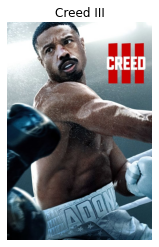

Recommendations



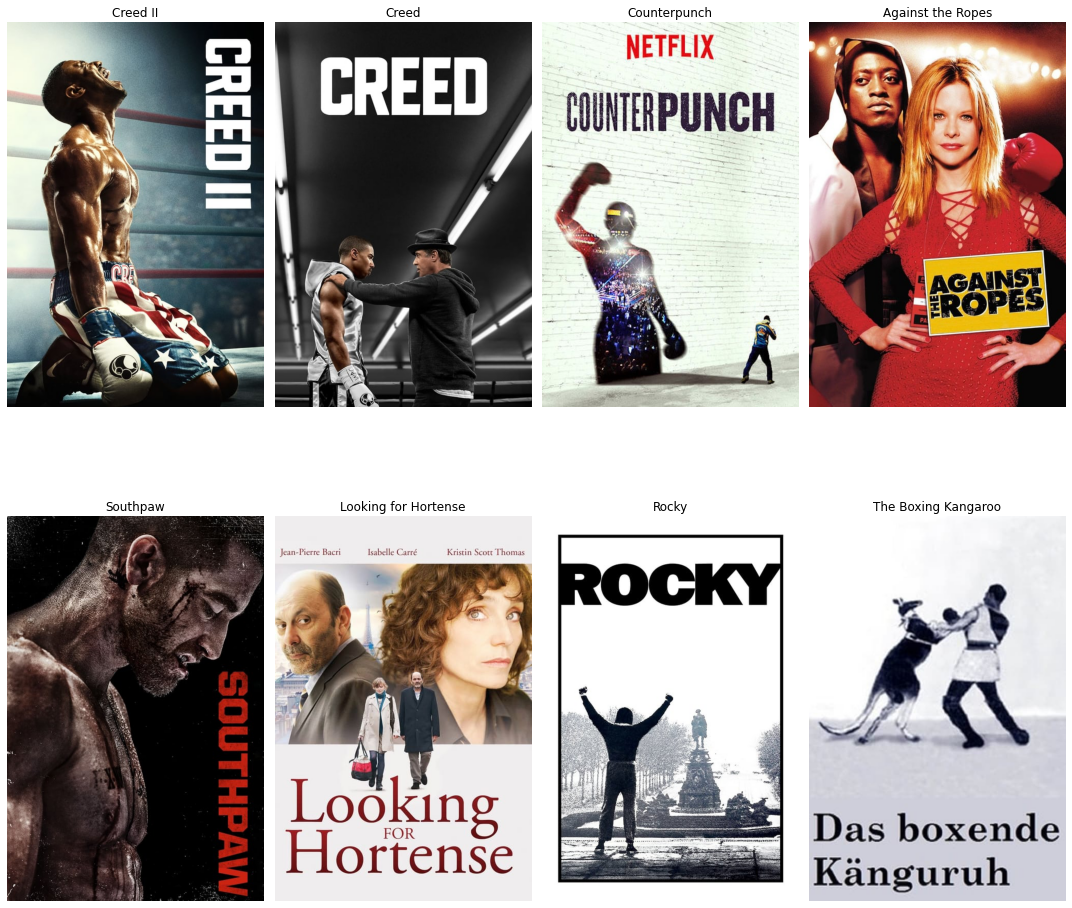

In [ ]:
get_recommendations("Creed III")

In [ ]:
pickle.dump(df1,open('movie_list.pkl','wb'))
pickle.dump(tfidf_matrix,open('tfidf_matrix.pkl','wb'))

#### Deployment

In [1]:
# Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit
!npm install -g localtunnel -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 112.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 114.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.543s


In [2]:
%%writefile movie_recommendation_app.py

import pickle
import streamlit as st
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

@st.cache
def get_recommendation(title):
    idx = df1.index[df1['title'] == title][0]
    poster = f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}'

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:13]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]

    recommended_movie_names = []
    recommended_movie_posters = []
    recommended_movie_overview = []

    for i, j in enumerate(result.poster_path):
        recommended_movie_names.append(result.iloc[i].title)
        recommended_movie_posters.append(f'https://image.tmdb.org/t/p/w500/{j}')
        recommended_movie_overview.append(result.iloc[i].overview)
    return poster, recommended_movie_names, recommended_movie_posters, recommended_movie_overview


image = Image.open('Movie Recommendation System.jpg')
st.image(image)

st.markdown('You might have wondered sometime or at some point that how do platforms like Netflix or AmazonPrime Video are able to recommend us TV shows or movies, what kind of an algorithm do these websites use to recommend us movies. Well as complicated or difficult as it might seem this is simply just a mixture of some machine learning algorithms with some Natural Language Processing. ')
st.markdown('There are two main techniques used in recommendation system, known as content-based filtering and collaborative filtering')
st.markdown('For this project I have used Content Based Recommendation System, It uses attributes such as genre, director, description, actors, etc. for movies, to make suggestions for the users. The intuition behind this sort of recommendation system is that if a user liked a particular movie or show, he/she might like a movie or a show similar to it.')

df1 = pickle.load(open('movie_list.pkl ', 'rb'))
tfidf_matrix = pickle.load(open('tfidf_matrix.pkl ', 'rb'))

movies_list = df1['title'].values
selected_movie = st.selectbox('Type and Choose The Movie',movies_list)

if st.button('Show Recommendation'):
    poster,recommended_movie_names,recommended_movie_posters,recommended_movie_overview = get_recommendation(selected_movie)
    st.image(poster,width=160)
    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.image(recommended_movie_posters[0])
        st.markdown(recommended_movie_names[0])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[0])

        st.image(recommended_movie_posters[4])
        st.markdown(recommended_movie_names[4])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[4])

        st.image(recommended_movie_posters[8])
        st.markdown(recommended_movie_names[8])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[8])

    with col2:
        st.image(recommended_movie_posters[1])
        st.markdown(recommended_movie_names[1])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[1])

        st.image(recommended_movie_posters[5])
        st.markdown(recommended_movie_names[5])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[5])

        st.image(recommended_movie_posters[9])
        st.markdown(recommended_movie_names[9])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[9])

    with col3:
        st.image(recommended_movie_posters[2])
        st.markdown(recommended_movie_names[2])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[2])

        st.image(recommended_movie_posters[6])
        st.markdown(recommended_movie_names[6])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[6])

        st.image(recommended_movie_posters[10])
        st.markdown(recommended_movie_names[10])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[10])

    with col4:
        st.image(recommended_movie_posters[3])
        st.markdown(recommended_movie_names[3])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[3])

        st.image(recommended_movie_posters[7])
        st.markdown(recommended_movie_names[7])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[7])

        st.image(recommended_movie_posters[11])
        st.markdown(recommended_movie_names[11])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[11])

Writing movie_recommendation_app.py


Writing movie_recommendation_app.py

When you'll run following cell, it will display a UI in your terminal with public URL of your tunnel and other status and metrics information about connections made over your tunnel

In [ ]:
!streamlit run movie_recommendation_app.py & npx localtunnel --port 8501 

npx: installed 22 in 2.778s
your url is: https://yellow-chefs-greet-34-86-172-75.loca.lt



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.172.75:8501

